In [1]:
# Online Retail II - Customer Segmentation Project

# Title: Customer Segmentation Using RFM and KMeans Clustering, Unlocking Customer Insights for Retail Marketing Strategy

## ✨ Highlights
- Applied RFM analysis to over 1 million retail transactions.
- Identified 4 distinct customer clusters using KMeans.
- Removed data quality issues like cancellations and anonymous purchases.
- Visualized customer behavior with violin plots.
- Built a foundation for marketing strategy and targeting.


## 📝 Executive Summary
This project analyzes transactional data from an online UK-based retailer to segment customers based on purchasing behavior. 

## 🗂️ Dataset Summary
- **Source**: UK-based online retailer (UCI Machine Learning Repository)
- **Time Period**: Dec 2009 – Dec 2011
- **Total Records**: ~1M transactions
- **Variables**:
  - `InvoiceNo`: Unique ID per transaction (prefix 'C' = cancelled)
  - `StockCode`, `Description`: Product codes and names
  - `Quantity`, `UnitPrice`: Quantity and price of items
  - `InvoiceDate`: Transaction timestamp
  - `CustomerID`, `Country`: Customer identifier and location


## 🔎 Research Questions and Objectives

Before exploring the dataset, we define our key analytical goals:

### 🎯 Objective
To segment customers based on their purchasing behavior using RFM (Recency, Frequency, Monetary) analysis and uncover actionable insights through clustering.

### ❓ Questions to Answer
1. Can we identify natural groupings of customers based on their buying behavior?
2. Which groups spend the most and return most frequently?
3. Are there customers at risk of churn based on recency?
4. What segments should be prioritized for retention or reactivation?

### 💡 Analytical Strategy
- Create RFM features to represent customer behavior.
- Normalize and filter the data to improve clustering.
- Use KMeans to reveal hidden segments.
- Interpret each cluster with actionable strategies.


## 1️⃣ Data Exploration
Explore structure, missing values, and quality issues in the raw dataset.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

In [146]:
# Load the dataset from the first sheet
df = pd.read_excel("./data/online_retail_II.xlsx", sheet_name=0)

### 1.1 View structure and missing values

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [28]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [30]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [32]:
df[df["Customer ID"].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [34]:
df[df.Quantity < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [36]:
df.Invoice = df.Invoice.astype("str")
df[df.Invoice.str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [38]:
df.Invoice.str.replace("[0-9]", "", regex = True).unique()

array(['', 'C', 'A'], dtype=object)

In [40]:
df.StockCode = df.StockCode.astype("str")
df[(df.StockCode.str.match('^\\d{5}$') == False) & (df.StockCode.str.match('^\\d{5}[a-zA-Z]$') == False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
572,489522,79323LP,LIGHT PINK CHERRY LIGHTS,1,2009-12-01 11:45:00,6.75,15998.00,United Kingdom
613,489526,15056BL,EDWARDIAN PARASOL BLACK,6,2009-12-01 11:50:00,5.95,12533.00,Germany
...,...,...,...,...,...,...,...,...
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525006,538153,15056bl,EDWARDIAN PARASOL BLACK,1,2010-12-09 16:31:00,12.72,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [42]:
df[(df.StockCode.str.match('^\\d{5}$') == False) & (df.StockCode.str.match('^\\d{5}[a-zA-Z]$') == False)].StockCode.unique()

array(['POST', '79323LP', '15056BL', 'D', '79323GR', 'DCGS0058',
       'DCGS0068', 'DOT', '15056bl', 'M', 'DCGS0004', 'DCGS0076', 'C2',
       'BANK CHARGES', 'DCGS0003', 'TEST001', 'gift_0001_80', 'DCGS0072',
       'gift_0001_20', 'DCGS0044', 'TEST002', 'gift_0001_10',
       'gift_0001_50', 'DCGS0066N', 'gift_0001_30', 'PADS', '72024HC',
       'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

## 2️⃣ Data Cleaning
Filter the dataset to include only valid purchases with complete customer info.

In [50]:
# This section removes invalid or incomplete transactions. 
# Specifically, we remove:
# - Transactions with missing Customer IDs
# - Transactions with non-positive Quantity or UnitPrice
# - Canceled transactions (InvoiceNo starts with 'C')

cleaned_df = df.copy()
cleaned_df.Invoice = cleaned_df.Invoice.astype("str")

mask = (
    cleaned_df.Invoice.str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df.StockCode = cleaned_df.StockCode.astype("str")

mask = (
    (cleaned_df.StockCode.str.match('^\\d{5}$') == True) |
    (cleaned_df.StockCode.str.match('^\\d{5}[a-zA-Z]$') == True) |
    (cleaned_df.StockCode.str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]

cleaned_df.dropna(subset=["Customer ID"], inplace= True)

cleaned_df = cleaned_df[cleaned_df.Price > 0]

## 3️⃣ Feature Engineering
Create RFM features per customer.

In [55]:
# Here we create features required for RFM analysis.
# - Monetary: Total sales value for each transaction line (Quantity * UnitPrice)
# - Recency: Days since last purchase
# - Frequency: Number of purchases

# Compute line-level sales value
cleaned_df["SalesLineTotal"] = cleaned_df.Quantity * cleaned_df.Price

# Group by customer
aggregated_df = cleaned_df.groupby(by = "Customer ID", as_index= False)\
    .agg(
        MonetaryValue = ("SalesLineTotal", "sum"),
        Frequency = ("Invoice", "nunique"),
        LastInvoiceDate = ("InvoiceDate", 'max')
    )

# Recency: days since last transaction
max_invoice_date = aggregated_df.LastInvoiceDate.max()
aggregated_df["Recency"] =  (max_invoice_date - aggregated_df.LastInvoiceDate).dt.days

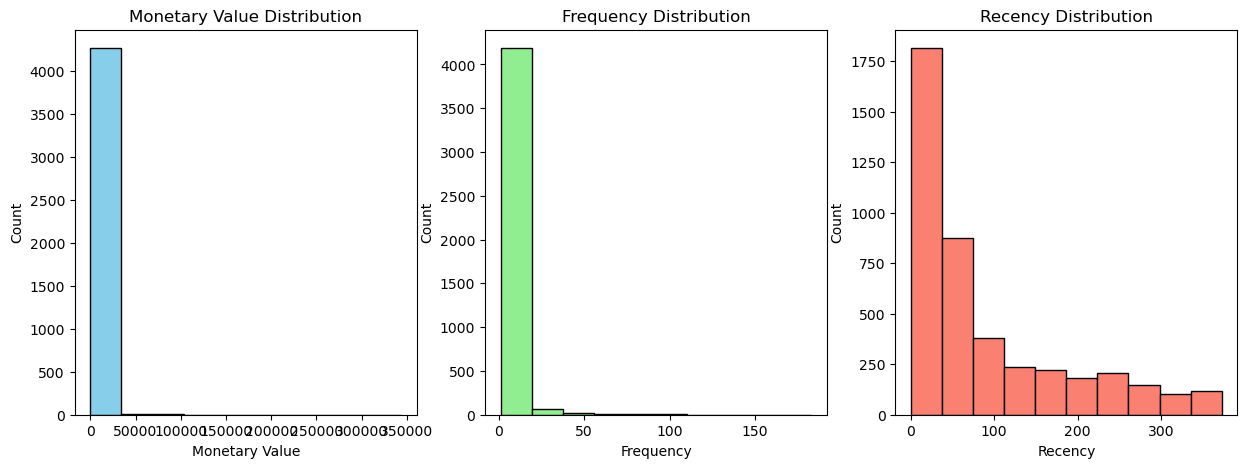

In [57]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df.MonetaryValue, bins = 10, color='skyblue', edgecolor = 'black')
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(aggregated_df.Frequency, bins = 10, color='lightgreen', edgecolor = 'black')
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(aggregated_df.Recency, bins = 10, color='salmon', edgecolor = 'black')
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout
plt.show()

## 4️⃣ Outlier Removal
Remove customers with extreme RFM values using IQR filtering.

In [60]:
M_Q1 = aggregated_df.MonetaryValue.quantile(0.25)
M_Q3 = aggregated_df.MonetaryValue.quantile(0.75)
M_IQR = M_Q3 - M_Q1

moneytary_outliers_df = aggregated_df[(aggregated_df.MonetaryValue > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df.MonetaryValue < (M_Q1 - 1.5*M_IQR))].copy()

In [62]:
M_Q1 = aggregated_df.Frequency.quantile(0.25)
M_Q3 = aggregated_df.Frequency.quantile(0.75)
M_IQR = M_Q3 - M_Q1

frequency_outliers_df = aggregated_df[(aggregated_df.Frequency > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df.Frequency < (M_Q1 - 1.5*M_IQR))].copy()

In [66]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(moneytary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))].copy()

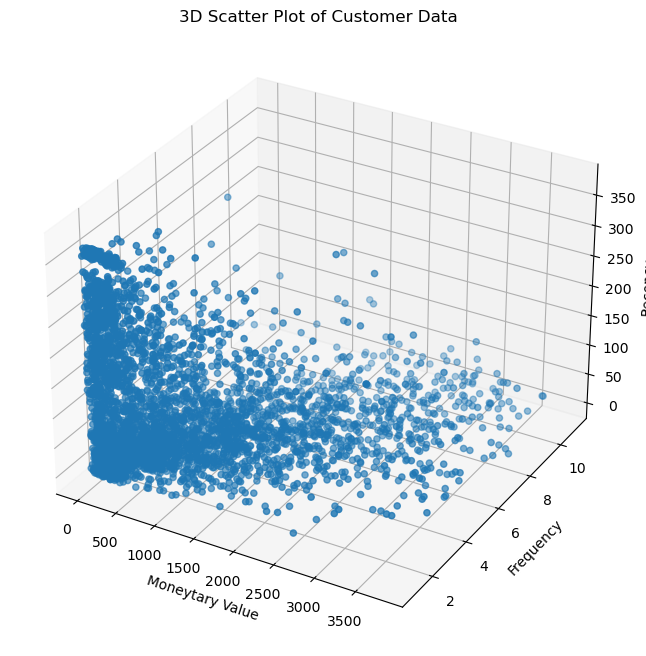

In [68]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = "3d")
scatter = ax.scatter(non_outliers_df.MonetaryValue, non_outliers_df.Frequency, non_outliers_df.Recency)
ax.set_xlabel("Moneytary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("3D Scatter Plot of Customer Data")
plt.show()

## 5️⃣ Normalization
Standardize RFM features before clustering.

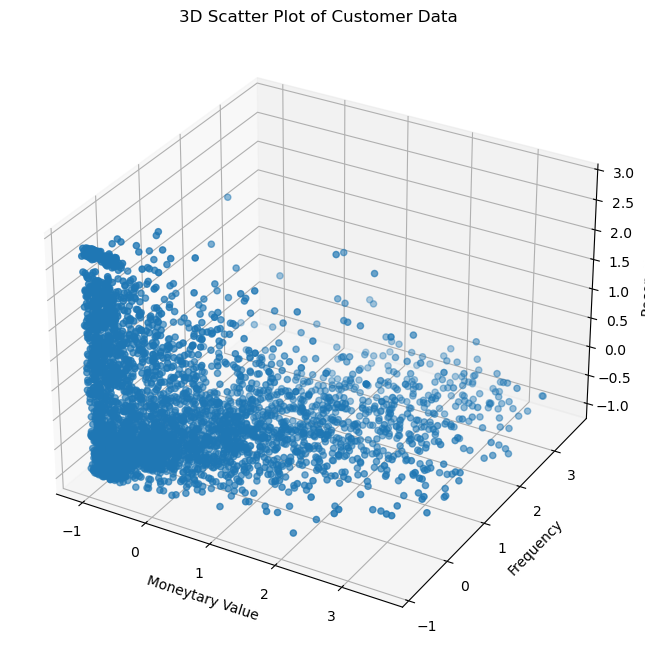

In [71]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])
scaled_data_df = pd.DataFrame(scaled_data, index = non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = "3d")
scatter = ax.scatter(scaled_data_df.MonetaryValue, scaled_data_df.Frequency, scaled_data_df.Recency)
ax.set_xlabel("Moneytary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("3D Scatter Plot of Customer Data")
plt.show()

## 6️⃣ Optimal Cluster Evaluation
Use Elbow and Silhouette methods to select the best number of clusters.

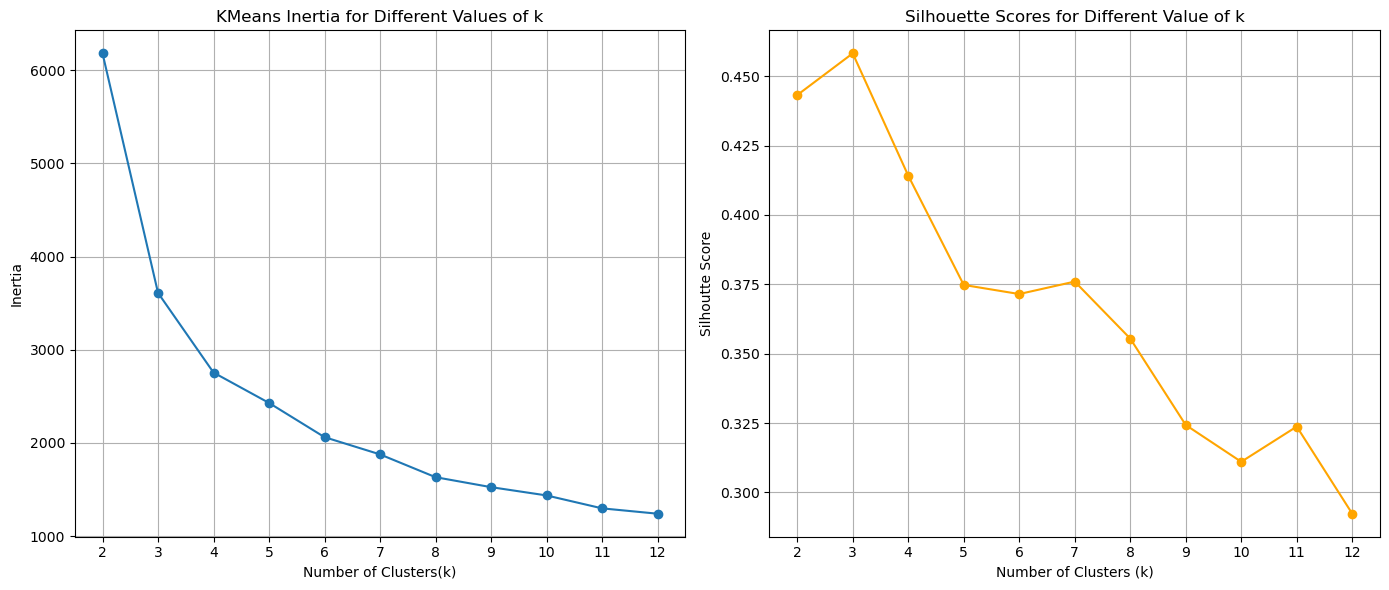

In [74]:
# First, determine the optimal number of clusters using Elbow Method and Silhouette Scores.
# This loop evaluates k values from 2 to 12, storing the inertia (within-cluster sum of squares)
# and silhouette score for each k to help us choose the best number of clusters.

max_k = 12
inertia = []
silhoutte_scores = []
k_value = range(2,max_k+1)

for k in k_value:
    kmeans = KMeans(n_clusters=k, random_state= 42, max_iter= 1000,n_init='auto')
    cluster_lables = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_lables)
    silhoutte_scores.append(sil_score)
    inertia.append(kmeans.inertia_) #save the average distance between the cluster and each datapoint

plt.figure(figsize = (14,6))

plt.subplot(1,2,1)
plt.plot(k_value, inertia, marker = 'o')
plt.title("KMeans Inertia for Different Values of k")
plt.xlabel("Number of Clusters(k)")
plt.ylabel("Inertia")
plt.xticks(k_value)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_value, silhoutte_scores, marker = 'o', color = 'orange')
plt.title("Silhouette Scores for Different Value of k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhoutte Score")
plt.xticks(k_value)
plt.grid(True)

plt.tight_layout()
plt.show()

## 7️⃣ KMeans Clustering
Perform final clustering using chosen value of `k=4`.

In [79]:
kmeans = KMeans(n_clusters= 4, random_state=42, max_iter=1000, n_init='auto')
non_outliers_df['Cluster'] = kmeans.fit_predict(scaled_data_df)

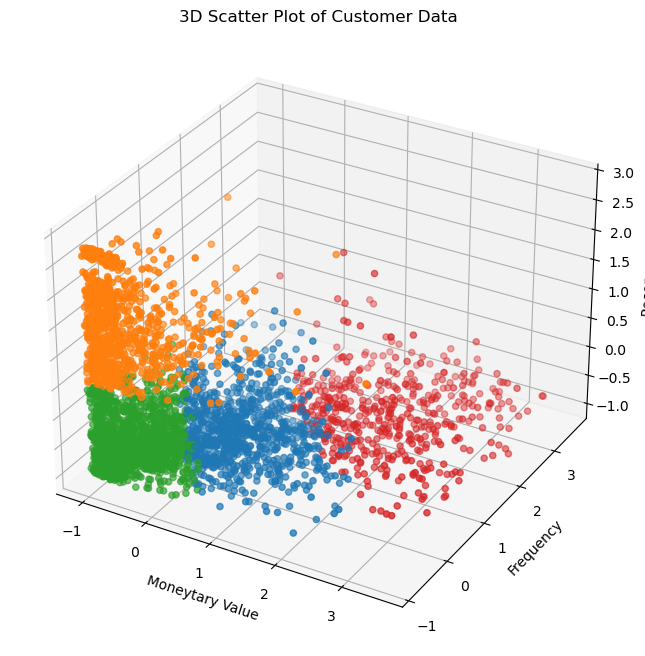

In [126]:
cluster_colors = {0: '#ff7f0e',  # Blue
                  1: '#1f77b4',  # Orange
                  2: '#d62728',  # Green
                  3: '#2ca02c'}  # Red
colors = non_outliers_df.Cluster.map(cluster_colors)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = "3d")
scatter = ax.scatter(scaled_data_df.MonetaryValue, scaled_data_df.Frequency, scaled_data_df.Recency, c = colors, marker = 'o')
ax.set_xlabel("Moneytary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("3D Scatter Plot of Customer Data")
plt.show()

## 8️⃣ Cluster Visualization
Understand how each cluster differs in RFM metrics.

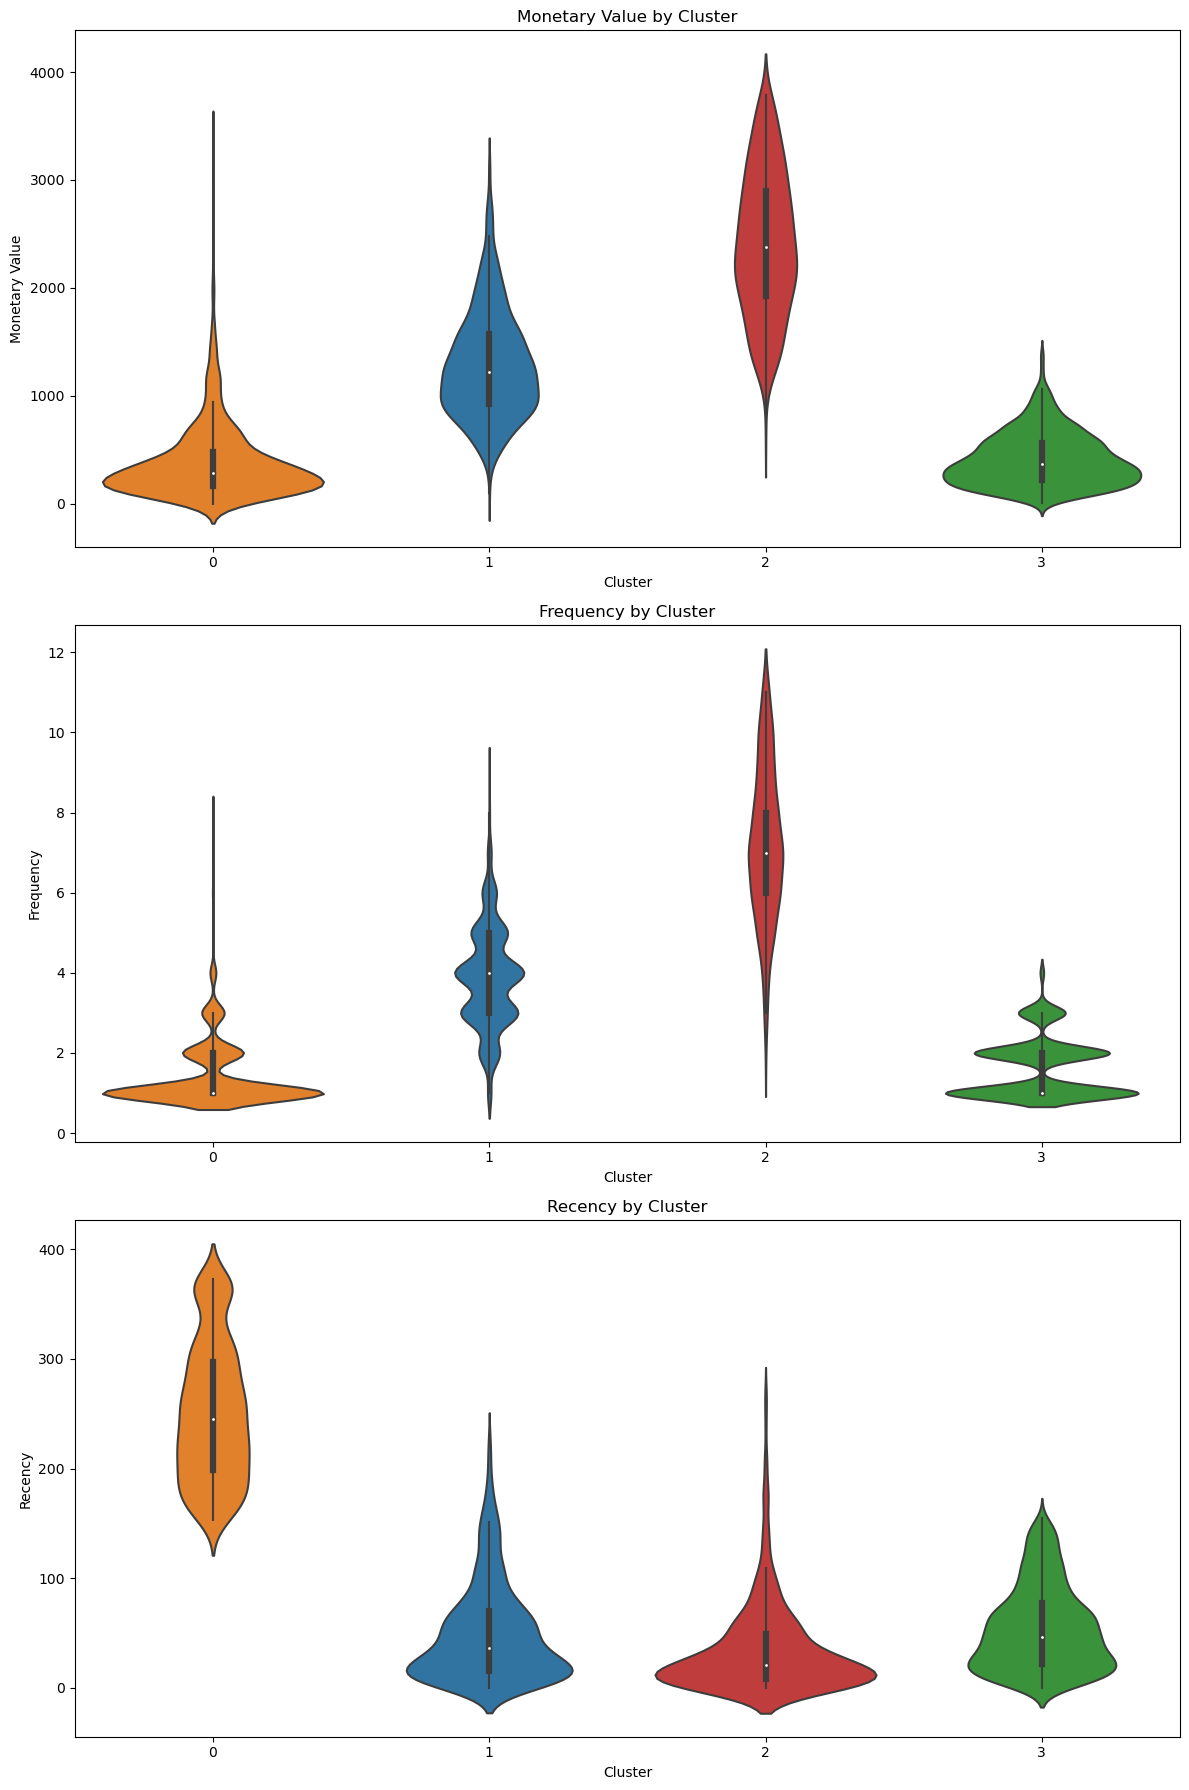

In [129]:
plt.figure(figsize = (12,18))

plt.subplot(3,1,1)
sns.violinplot(x = non_outliers_df.Cluster, y = non_outliers_df.MonetaryValue, palette=cluster_colors)
#sns.violinplot(y = non_outliers_df.MonetaryValue, color = 'gray', linewidth=1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")

plt.subplot(3,1,2)
sns.violinplot(x = non_outliers_df.Cluster, y = non_outliers_df.Frequency, palette=cluster_colors)
#sns.violinplot(y = non_outliers_df.Frequency, color = 'gray', linewidth=1.0)
plt.title("Frequency by Cluster")
plt.ylabel("Frequency")

plt.subplot(3,1,3)
sns.violinplot(x = non_outliers_df.Cluster, y = non_outliers_df.Recency, palette=cluster_colors)
#sns.violinplot(y = non_outliers_df.Recency, color = 'gray', linewidth=1.0)
plt.title("Recency by Cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()

## 9️⃣ Cluster Interpretation

1. Cluster 0 (Blue): "Retain"
- Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
- Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.
2. Cluster 1 (Orange): "Re-Engage"
- Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
- Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.
3. Cluster 2 (Green): "Nurture"
- Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
- Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.
3. Cluster 3 (Red): "Reward"
- Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
- Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

### Summary of Cluster Names:

- Cluster 0 (Blue): "Retain"
- Cluster 1 (Orange): "Re-Engage"
- Cluster 2 (Green): "Nurture"
- Cluster 3 (Red): "Reward"

## 🔟 Outlier Clusters & Full Segmentation Analysis
This section classifies extreme RFM outliers as separate behavioral clusters and integrates them with the core clustering results.

In [135]:
# Identify overlapping and distinct outliers from Monetary and Frequency perspectives
overlap_indices = moneytary_outliers_df.index.intersection(frequency_outliers_df.index)
monetary_only_outliers = moneytary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = moneytary_outliers_df.loc[overlap_indices]

# Assign unique cluster labels for these outliers
monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

# Combine all labeled outlier groups
outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

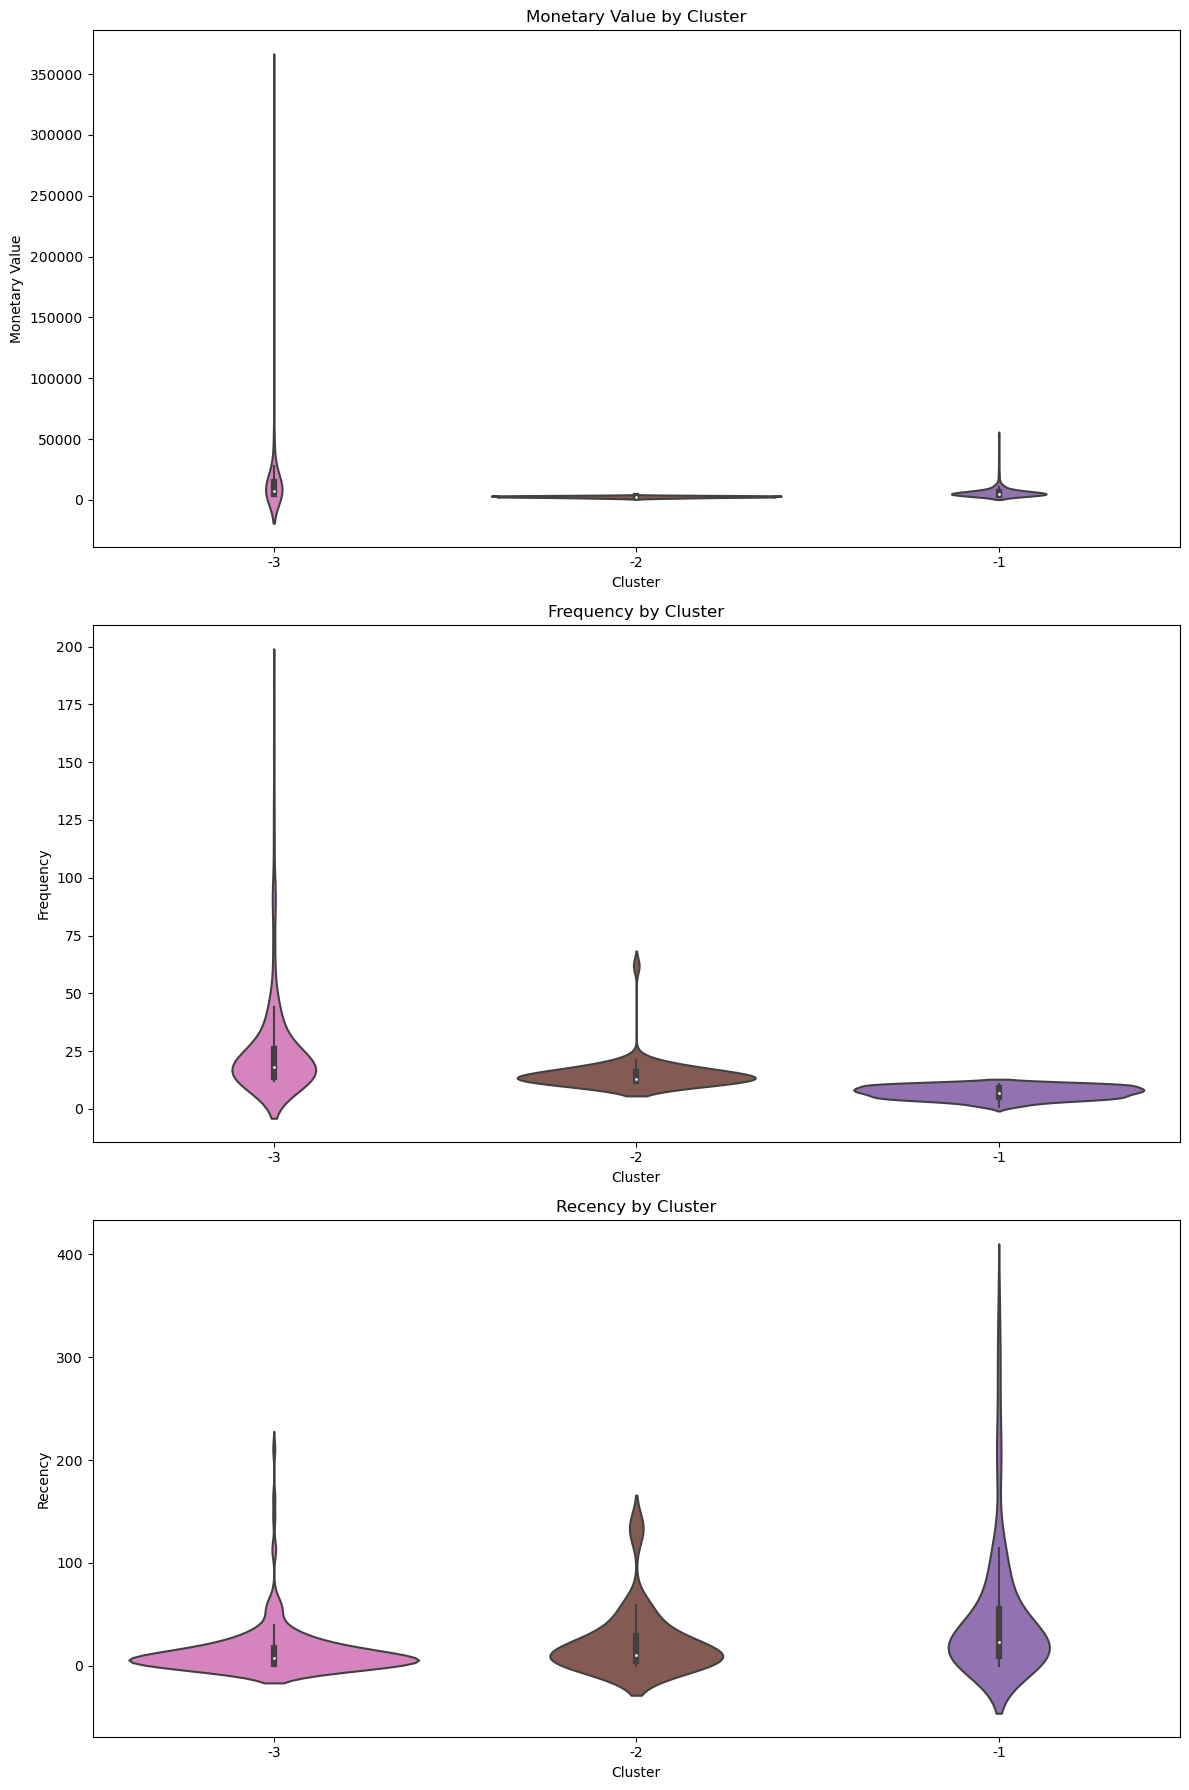

In [137]:
# Define custom colors for new outlier clusters
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

# Visualize RFM metrics by outlier cluster
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors)
#sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors)
#sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors)
#sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

- Cluster -1 (Monetary Outliers) PAMPER: Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent. Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.
- Cluster -2 (Frequency Outliers) UPSELL: Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities. Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.
- Cluster -3 (Monetary & Frequency Outliers) DELIGHT: Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention. Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [140]:
# Define final human-readable labels for all clusters
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}
# Combine main and outlier cluster dataframes
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

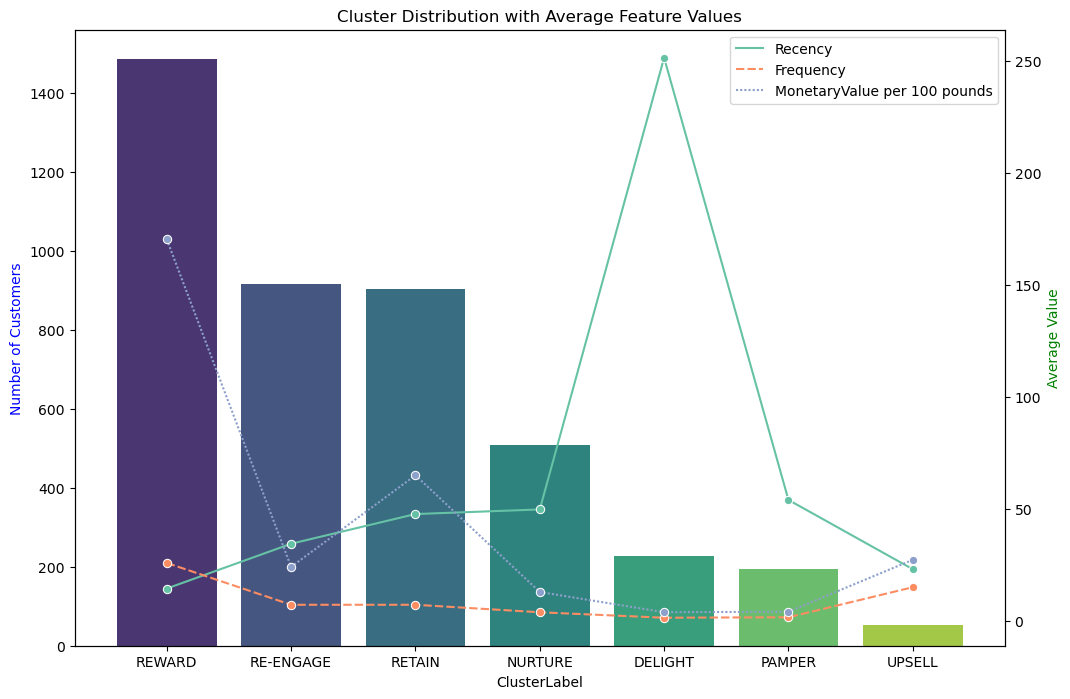

In [142]:
# Analyze the distribution of cluster labels
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

# Dual-axis plot: bar for count, line for RFM averages
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis')
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()

## ✅ Final Takeaways

### ✅ Answers to Research Questions

1. **Can we identify natural groupings of customers based on their buying behavior?**
   - Yes. Using RFM metrics and KMeans, we identified 4 core clusters and 3 outlier-based behavioral groups.

2. **Which groups spend the most and return most frequently?**
   - Clusters labeled as **REWARD** and **DELIGHT** had the highest monetary values and frequency metrics, indicating loyal high-value customers.

3. **Are there customers at risk of churn based on recency?**
   - Yes. Clusters such as **RE-ENGAGE** and **Retain** contain customers with low recency scores, signaling potential churn risk.

4. **What segments should be prioritized for retention or reactivation?**
   - **RETAIN** and **RE-ENGAGE** segments show moderate-to-high past activity and should be targeted for proactive retention.

---
- End-to-end customer segmentation pipeline.
- Data wrangling, RFM analysis, unsupervised clustering.
- Value-added insights for targeting customer campaigns.


## 🚀 Future Work
- Predict lifetime value and churn
- Segment by country or seasonality
- Apply classification to new users